In [ ]:
%%sh
## Dependencies
pip install pydotplus
pip install tqdm

In [1]:
%load_ext autoreload
%autoreload 2

# helper python file
import ml_pipeline as pipeline

Using TensorFlow backend.


In [2]:
(train_df,test_df)=pipeline.read_input_data()
(seq_test,seq_train,word_index)=pipeline.tokenize_data(test_df,train_df)

  2%|▏         | 3350/153164 [00:00<00:04, 33482.87it/s]

num train:  159571
num test:  153164
pre-processing train data...


100%|██████████| 159571/159571 [00:04<00:00, 32131.56it/s]


tokenizing input data...
dictionary size:  348520


In [3]:
EMBEDDING_FILE = './data/crawl-300d-2M.vec'
embedding_matrix=pipeline.prepare_embeddings(EMBEDDING_FILE,word_index)

1999996it [02:41, 12368.44it/s]


preparing embedding matrix...
number of null word embeddings: 810


In [4]:
model=pipeline.init_model(embedding_matrix)

training CNN ...











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 300)          6000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 150, 64)           134464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 75, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 75, 64)            28736     
___________________________________

In [6]:
from keras.utils import plot_model
plot_model(model,
           to_file='images/cnn_model.png',
           show_shapes=True,
           show_layer_names=True)

In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "images/cnn_model.png")

In [8]:
#training params
batch_size = 256 
num_epochs = 8 

label_names = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

y_train = train_df[label_names].values
hist=pipeline.train_model(model,num_epochs,batch_size,seq_train,y_train)



Train on 127656 samples, validate on 31915 samples
Epoch 1/8
127656/127656 [==============================] - 7s 56us/step - loss: 0.1768 - acc: 0.9463 - val_loss: 0.0647 - val_acc: 0.9788
Epoch 2/8
127656/127656 [==============================] - 4s 32us/step - loss: 0.0783 - acc: 0.9760 - val_loss: 0.0603 - val_acc: 0.9798
Epoch 3/8
127656/127656 [==============================] - 4s 33us/step - loss: 0.0698 - acc: 0.9780 - val_loss: 0.0579 - val_acc: 0.9804
Epoch 4/8
127656/127656 [==============================] - 4s 32us/step - loss: 0.0640 - acc: 0.9791 - val_loss: 0.0573 - val_acc: 0.9805
Epoch 5/8
127656/127656 [==============================] - 4s 30us/step - loss: 0.0593 - acc: 0.9803 - val_loss: 0.0569 - val_acc: 0.9805
Epoch 6/8
127656/127656 [==============================] - 4s 30us/step - loss: 0.0557 - acc: 0.9811 - val_loss: 0.0558 - val_acc: 0.9809
Epoch 7/8
127656/127656 [==============================] - 4s 29us/step - loss: 0.0526 - acc: 0.9819 - val_loss: 0.0569

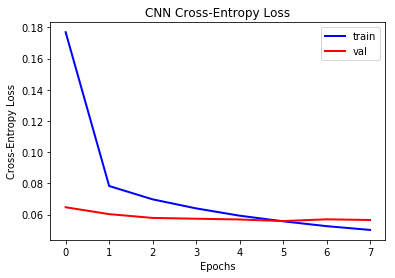

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt

#generate plots
plt.figure()
plt.plot(hist.history['loss'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('CNN Cross-Entropy Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

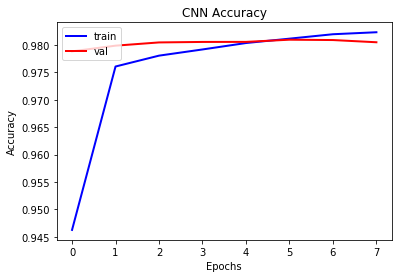

In [13]:
plt.figure()
plt.plot(hist.history['acc'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_acc'], lw=2.0, color='r', label='val')
plt.title('CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [20]:
y_test = model.predict(seq_test)
pipeline.create_submission_file(test_df,y_test,'cnn_fasttext_submission.csv')